# <center> Database Management Project: <br> Recommender System using ALS for implicit Feedback </center>
### <center> Tommy Tran, Thomas de Mareuil, Constantin Vodé - March 2020 </center>

This project is based on the paper "Fast Matrix Factorization for Online Recommendation with Implicit Feedback" by He Xiangnan _et al._ , School of Computing, National University of Singapore, published at SIGIR '16, July 17-21, 2016, Pisa, Italy, and available through this [link](https://www.comp.nus.edu.sg/~xiangnan/papers/sigir16-eals-cm.pdf).

The data we use in this project is a dataset recommended in the paper, comprising 78.930 reviews for Cell phones & Accesories on Amazon, collected by Stanford's Jure Leskovec, PhD, and available through this [link](http://snap.stanford.edu/data/web-Amazon-links.html).

We start by parsing the original dataset and loading it in Spark to explore it. Then we implement the regular ALS method for matrix factorization and the more efficient eALS method presented in the paper. In these steps, we implement algortihms in Spark "from scratch", translating some Java code lines that can be found in the paper. Last, in the final section we implement ALS using PySpark's existing ALS library, and we test it on our data.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Database-Management-Project:--Recommender-System-using-ALS-for-implicit-Feedback-" data-toc-modified-id="-Database-Management-Project:--Recommender-System-using-ALS-for-implicit-Feedback--1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Database Management Project: <br> Recommender System using ALS for implicit Feedback </center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#-Tommy-Tran,-Thomas-de-Mareuil,-Constantin-Vodé---March-2020-" data-toc-modified-id="-Tommy-Tran,-Thomas-de-Mareuil,-Constantin-Vodé---March-2020--1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span><center> Tommy Tran, Thomas de Mareuil, Constantin Vodé - March 2020 </center></a></span></li></ul></li><li><span><a href="#Parsing,-loading-and-exploring-the-data-in-Spark" data-toc-modified-id="Parsing,-loading-and-exploring-the-data-in-Spark-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Parsing, loading and exploring the data in Spark</a></span><ul class="toc-item"><li><span><a href="#Parsing-the-Data" data-toc-modified-id="Parsing-the-Data-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Parsing the Data</a></span></li><li><span><a href="#Loading-the-data-in-Spark" data-toc-modified-id="Loading-the-data-in-Spark-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Loading the data in Spark</a></span></li><li><span><a href="#Data-exploration-with-Spark" data-toc-modified-id="Data-exploration-with-Spark-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Data exploration with Spark</a></span><ul class="toc-item"><li><span><a href="#What-are-the-possible-ratings?" data-toc-modified-id="What-are-the-possible-ratings?-1.1.3.1"><span class="toc-item-num">1.1.3.1&nbsp;&nbsp;</span>What are the possible ratings?</a></span></li><li><span><a href="#What-are-the-minimum-number-of-ratings-per-user-and-minimum-number-of-ratings-per-product-(for-rated-products)?" data-toc-modified-id="What-are-the-minimum-number-of-ratings-per-user-and-minimum-number-of-ratings-per-product-(for-rated-products)?-1.1.3.2"><span class="toc-item-num">1.1.3.2&nbsp;&nbsp;</span>What are the minimum number of ratings per user and minimum number of ratings per product (for rated products)?</a></span></li><li><span><a href="#What-is-the-total-number-of-users-in-the-data-set?" data-toc-modified-id="What-is-the-total-number-of-users-in-the-data-set?-1.1.3.3"><span class="toc-item-num">1.1.3.3&nbsp;&nbsp;</span>What is the total number of users in the data set?</a></span></li><li><span><a href="#What-is-the-total-number-of-products-in-the-data-set?" data-toc-modified-id="What-is-the-total-number-of-products-in-the-data-set?-1.1.3.4"><span class="toc-item-num">1.1.3.4&nbsp;&nbsp;</span>What is the total number of products in the data set?</a></span></li><li><span><a href="#What-are-the-unrated-products?" data-toc-modified-id="What-are-the-unrated-products?-1.1.3.5"><span class="toc-item-num">1.1.3.5&nbsp;&nbsp;</span>What are the unrated products?</a></span></li><li><span><a href="#Extracting-relevant-rating-data-as-an-RDD-for-further-analysis" data-toc-modified-id="Extracting-relevant-rating-data-as-an-RDD-for-further-analysis-1.1.3.6"><span class="toc-item-num">1.1.3.6&nbsp;&nbsp;</span>Extracting relevant rating data as an RDD for further analysis</a></span></li></ul></li></ul></li><li><span><a href="#Our-implemention-of-the-ALS-matrix-factorization-algorithm-in-Spark" data-toc-modified-id="Our-implemention-of-the-ALS-matrix-factorization-algorithm-in-Spark-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Our implemention of the ALS matrix factorization algorithm in Spark</a></span></li><li><span><a href="#Our-implemention-of-the-eALS-algorithm-for-fast-matrix-factorization-in-Spark" data-toc-modified-id="Our-implemention-of-the-eALS-algorithm-for-fast-matrix-factorization-in-Spark-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Our implemention of the eALS algorithm for fast matrix factorization in Spark</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Reconstruct-ratings-from-reconstructed-rating-matrix-table-to-compare-with-predicted-ratings" data-toc-modified-id="Reconstruct-ratings-from-reconstructed-rating-matrix-table-to-compare-with-predicted-ratings-1.3.0.1"><span class="toc-item-num">1.3.0.1&nbsp;&nbsp;</span>Reconstruct ratings from reconstructed rating matrix table to compare with predicted ratings</a></span></li></ul></li></ul></li><li><span><a href="#ALS-implementation-using-the-existing-PySpark-library" data-toc-modified-id="ALS-implementation-using-the-existing-PySpark-library-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>ALS implementation using the existing PySpark library</a></span><ul class="toc-item"><li><span><a href="#Recommender-system-with-existing-PySpark-ALS" data-toc-modified-id="Recommender-system-with-existing-PySpark-ALS-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Recommender system with existing PySpark ALS</a></span></li><li><span><a href="#ALS-model-evaluation-and-selection-(grid-search)" data-toc-modified-id="ALS-model-evaluation-and-selection-(grid-search)-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>ALS model evaluation and selection (grid search)</a></span></li><li><span><a href="#ALS-model-learning-curve" data-toc-modified-id="ALS-model-learning-curve-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>ALS model learning curve</a></span></li></ul></li></ul></li></ul></div>

In [1]:
# spark imports
from pyspark import SparkContext
from pyspark.sql import SparkSession, Row
from pyspark.sql.functions import UserDefinedFunction, explode, desc
from pyspark.sql.types import StringType, ArrayType
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.mllib.recommendation import ALS
from pyspark.ml.recommendation import ALS

# data science imports
import pandas as pd
import numpy as np
from numpy import matrix
from numpy.random import rand
from sklearn import preprocessing
import math
from math import floor

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt

# other imports
import sys
import time
#from __future__ import print_function
import gzip
from ast import literal_eval
import json
import simplejson

%matplotlib inline

sc = SparkContext('local')
spark = SparkSession(sc)

/Users/Thomas/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Parsing, loading and exploring the data in Spark

### Parsing the Data

In [3]:
def parse(filename):
    """
    Function to parse the "Cell Phones & Accessories Ratings" dataset (.txt format)
    """
    f = open(filename, 'r')
    entry = {}
    for l in f:
        l = l.strip()
        colonPos = l.find(':')
        if colonPos == -1:
            yield entry
            entry = {}
            continue
        eName = l[:colonPos]
        rest = l[colonPos+2:]
        entry[eName] = rest
    yield entry


# Parsing the data

for e in parse("Cell_Phones_&_Accessories.txt"):
    a = simplejson.dumps(e)
    a = literal_eval(a)
    df = pd.DataFrame(a, index=[1,])
    df = df.drop(index=1)
    break;

i=0
for e in parse("Cell_Phones_&_Accessories.txt"):
    i+=1
    b = simplejson.dumps(e)
    b = literal_eval(b)

    b = pd.DataFrame(b, index=[1,])
    df = df.append(b, ignore_index=True)
    if i==1000:
        break;

In [4]:
# Encoding products Ids (label encoding)

le = preprocessing.LabelEncoder()
le.fit(df['product/productId'])
le.classes_
df['product/productId'] = le.transform(df['product/productId'])

# Encoding users Ids (label encoding)

le = preprocessing.LabelEncoder()
le.fit(df['review/userId'])
le.classes_
df['review/userId'] = le.transform(df['review/userId'])

In [5]:
# Saving as .csv

df.to_csv('ratings.csv', index=False)

df = pd.read_csv('ratings.csv')
df.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,76,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,202,A. Igoe,0/0,1.0,1233360000,Don't buy!,"First of all, the company took my money and se..."
1,76,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,734,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Soft...,Great product- tried others and this is a ten ...
2,76,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,398,"Daniel M. Johnson ""rocknbluesharp""",0/0,4.0,1186704000,good,works real good....a little hard to set up...w...
3,43,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,316,E. Owens,4/5,4.0,1146182400,No instructions included...,The price was right for this cable ($11.95+$4....
4,43,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,857,"Isaac Salas ""=CRBF=gB^link""",0/0,1.0,1173657600,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB ch...


Now that we have a useable dataset, we can load it and explore it in Spark.

### Loading the data in Spark

In [6]:
# spark config
spark = SparkSession \
    .builder \
    .appName("product recommendations") \
    .config("spark.driver.maxResultSize", "96g") \
    .config("spark.driver.memory", "96g") \
    .config("spark.executor.memory", "8g") \
    .config("spark.master", "local[12]") \
    .getOrCreate()

# get spark context
sc = spark.sparkContext

In [7]:
ratings = spark.read.load('ratings.csv', format='csv', header=True, inferSchema=True)
ratings.show()

+-----------------+--------------------+-------------+-------------+--------------------+------------------+------------+-----------+--------------------+--------------------+
|product/productId|       product/title|product/price|review/userId|  review/profileName|review/helpfulness|review/score|review/time|      review/summary|         review/text|
+-----------------+--------------------+-------------+-------------+--------------------+------------------+------------+-----------+--------------------+--------------------+
|               76|Mobile Action MA7...|      unknown|          202|             A. Igoe|               0/0|         1.0| 1233360000|          Don't buy!|First of all, the...|
|               76|Mobile Action MA7...|      unknown|          734|        Steven Martz|               0/0|         5.0| 1191456000|Mobile Action Blu...|Great product- tr...|
|               76|Mobile Action MA7...|      unknown|          398|"Daniel M. Johnso...|               0/0|         4.0

### Data exploration with Spark

#### What are the possible ratings?

In [10]:
print('Distinct values of ratings:')
print(sorted(ratings.select('review/score').distinct().rdd.map(lambda r: r[0]).collect()))

Distinct values of ratings:


IllegalArgumentException: 'Unsupported class file major version 57'

We can see that with this command we catch some elements that are not ratings. We will drop them and convert the ratings later so that they can be processed.

#### What are the minimum number of ratings per user and minimum number of ratings per product (for rated products)?

In [11]:
tmp1 = ratings.groupBy("review/userid").count().toPandas()['count'].min()
tmp2 = ratings.groupBy("product/title").count().toPandas()['count'].min()
print('For the users that rated products and the products that were rated:')
print('Minimum number of ratings per user is {}'.format(tmp1))
print('Minimum number of ratings per product is {}'.format(tmp2))

IllegalArgumentException: 'Unsupported class file major version 57'

#### What is the total number of users in the data set?

In [27]:
tmp3 = ratings.select('review/userid').distinct().count()
print('We have a total of {} distinct users in the data set'.format(tmp3))

We have a total of 9245 distinct users in the data sets


#### What is the total number of products in the data set?

In [28]:
tmp4 = ratings.select('product/productid').distinct().count()
print('We have a total of {} distinct products in the data set'.format(tmp4))

We have a total of 976 distinct products in the data sets


#### What are the unrated products?

In [29]:
# We create a temp SQL table view for easier query:
ratings.createOrReplaceTempView("ratings")

print('List of products that are not rated yet: ')

# SQL query (NOTE: WHERE ... NOT IN ... == ... LEFT JOIN ... WHERE ... IS NULL)

# Approach 1
spark.sql(
    "SELECT `product/productid`, `product/title`"
    "FROM ratings "
).show(10)

# Approach 2
# spark.sql(
#     "SELECT m.movieId, m.title "
#     "FROM movies m LEFT JOIN ratings r ON m.movieId=r.movieId "
#     "WHERE r.movieId IS NULL"
# ).show(10)

List product that are not rated yet: 
+-----------------+--------------------+
|product/productid|       product/title|
+-----------------+--------------------+
|              741|Mobile Action MA7...|
|              741|Mobile Action MA7...|
|              741|Mobile Action MA7...|
|              372|USB Data Cable fo...|
|              372|USB Data Cable fo...|
|              372|USB Data Cable fo...|
|              372|USB Data Cable fo...|
|              372|USB Data Cable fo...|
|              372|USB Data Cable fo...|
|              372|USB Data Cable fo...|
+-----------------+--------------------+
only showing top 10 rows



<font color='red'> **_@TOMMY: can you display above only the unique products that are not rated please (only 1 line per product)? And the nb of unrated products. Thanks!_** </font>

#### Extracting relevant rating data as an RDD for further analysis

In [14]:
# File location and type
file_location = "ratings.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

rating_data = df.rdd

header = rating_data.take(1)[0]

rating_data = rating_data \
    .filter(lambda line: line!=header) \
    .map(lambda x: list(x))\
    .map(lambda x: (int(x[3]), int(x[0]), x[6].split('/')[0])) \
    .filter(lambda x: x[2]!=' and Roll!"""') \
    .filter(lambda x: x[2]!=' & Books"""') \
    .filter(lambda x: x[2]!=' etc."""') \
    .filter(lambda x: x[2]!=' gadget guy"""') \
    .map(lambda x: (x[0], x[1], float(x[2])))\
    .cache()

In [ ]:
rating_data.collect()

## Our implemention of the ALS matrix factorization algorithm in Spark

First let's write useful functions for ALS:

In [6]:
def set_data_matrix(M, data_list):
    for data in data_list:
        M[data[0], data[1]] = data[2]
    return M

def update(i, mat, ratings): # i = x, mat = V if caculate U, rating is M.
    uu = mat.shape[0]
    ff = mat.shape[1]

    XtX = mat.T * mat # projection matrix
    Xty = mat.T * ratings[i, :].T

    for j in range(ff):
        XtX[j, j] += LAMBDA * uu

    return np.linalg.solve(XtX, Xty)

def rmse(R, ms, us):
    diff = R - ms * us.T
    return np.sqrt(np.sum(np.power(diff, 2)) / (M * U)
                  )

Then let's initialize matrices and parameters for the algorithm:

In [7]:
# re-init spark
spark = SparkSession\
        .builder\
        .appName("PythonALS")\
        .getOrCreate()

sc = spark.sparkContext

In [8]:
rating_list = rating_data.collect()

LAMBDA = 0.01   # regularization

U = len(pd.read_csv('ratings.csv')['product/productId'].unique()) # nb of items
M = len(pd.read_csv('ratings.csv')['review/userId'].unique()) # nb of users
F = 8 # latent vector    
num_iters = 10
partitions = 2

R = np.full((M, U), 0, dtype=np.float64)
R = matrix(set_data_matrix(R, rating_list)) # M

users = matrix(np.full((M, F), 1.0)) # U users matrix
product = matrix(np.full((U, F), 1.0)) # V product matrix

Rb = sc.broadcast(R)
users_b = sc.broadcast(users)
product_b = sc.broadcast(product)

And now let's run the algorithm itself:

In [9]:
for i in range(num_iters):
    users = sc.parallelize(range(M), partitions) \
           .map(lambda x: update(x, product_b.value, Rb.value)) \
           .collect() # U, x = row number
    # collect() returns a list, so array ends up being
    # a 3-d array, we take the first 2 dims for the matrix
    users = matrix(np.array(users)[:, :, 0]) # U
    users_b = sc.broadcast(users)

    product = sc.parallelize(range(U), partitions) \
           .map(lambda x: update(x, users_b.value, Rb.value.T)) \
           .collect() # V, x = columns
    product = matrix(np.array(product)[:, :, 0])
    product_b = sc.broadcast(product)

    error = rmse(R, users, product)

#print("Iteration %d:" % i)
print("R = %s:" % (str(R))) 
print('\n')
print("ms = %s:" % (str(users)))   
print('\n')
print("us = %s:" % (str(product)))           
#print("\nRMSE: %5.4f\n" % error)
print('\n')
print("RMSE = %.4f" % error)

R= [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [4. 2. 5. ... 0. 0. 0.]]:
ms= [[2.25425806e-14 2.25425806e-14 2.25425806e-14 ... 2.25425806e-14
  2.25425806e-14 2.25425806e-14]
 [1.27787654e-02 1.27787654e-02 1.27787654e-02 ... 1.27787654e-02
  1.27787654e-02 1.27787654e-02]
 [2.29777572e-03 2.29777572e-03 2.29777572e-03 ... 2.29777572e-03
  2.29777572e-03 2.29777572e-03]
 ...
 [4.59555144e-04 4.59555144e-04 4.59555144e-04 ... 4.59555144e-04
  4.59555144e-04 4.59555144e-04]
 [1.13630378e-03 1.13630378e-03 1.13630378e-03 ... 1.13630378e-03
  1.13630378e-03 1.13630378e-03]
 [4.22484105e-01 4.22484105e-01 4.22484105e-01 ... 4.22484105e-01
  4.22484105e-01 4.22484105e-01]]:



us= [[6.99674285e-03 6.99674285e-03 6.99674285e-03 ... 6.99674285e-03
  6.99674285e-03 6.99674285e-03]
 [3.57073218e-03 3.57073218e-03 3.57073218e-03 ... 3.57073218e-03
  3.57073218e-03 3.57073218e-03]
 [8.76647815e-03 8.76647815e-0

##  Our implemention of the eALS algorithm for fast matrix factorization in Spark

Again, let's write the fuctions useful for eALS matric factorization. Pseudo-code (Java-like) was found in the paper mentionned in introduction to this project.

In [ ]:
def set_data_matrix(M, data_list):
    for data in data_list:
        M[data[0], data[1]] = data[2]
    return M

In [19]:
def update_user(u, U, V, R, SU, SV):
    itemList = nb_items
    SU_bis = SU.value
    SV_bis = SV.value

    # prediction cache for the user
    for i in range(itemList):
        prediction_items[i] = U[u]@V[i];
        rating_items[i] = R[u][i];
        w_items[i] = W[u][i]

    oldVector = R[u]
    for f in range(factors):
        numer = 0
        denom = 0
        
        #O(K) complexity for the negative part
        for k in range(factors):
            if k != f:
                numer -= U[u][ k] * SV_bis[f][k]
        
        #O(Nu) complexity for the positive part
        for i in range(itemList):
            prediction_items[i] -= U[u][f] * V[i][f]
            numer +=  (w_items[i]*rating_items[i] - (w_items[i]-Wi[i]) * prediction_items[i]) * V[i][f]
            denom += (w_items[i]-Wi[i]) * V[i][f] * V[i][f]
        denom += SV_bis[f][f] + reg;

        #Parameter Update
        U[u][f] = numer / denom

        #Update the prediction cache
        for i in range(itemList):
            prediction_items[i] += U[u][f] * V[i][f]

    #Update the SU cache
    for f in range(factors):
        for k in range(factors):
            val = SU_bis[f][k] - oldVector[f] * oldVector[k] + U[u][f] * U[u][k]
            SU_bis[f][k] = val
            SU_bis[k][f] = val
    #SU = sc.broadcast(SU_bis)
    return U[u]

In [20]:
def update_item(i, V, U, R, SU, SV):
    userList = nb_users
    SU_bis = SU.value
    SV_bis = SV.value

    # prediction cache for the user
    for u in range(userList):
        prediction_users[u] = U[u]@V[i]
        rating_users[u] = R[u][i]
        w_users[u] = W[u][i]

    oldVector = R[i]
    for f in range(factors):
        numer = 0
        denom = 0
        
        #O(K) complexity for the negative part
        for k in range(factors):
            if k != f:
                numer -= V[i][ k] * SU_bis[f][k]
        

        #O(Nu) complexity for the positive part
        for u in range(userList):
            prediction_users[u] -= U[u][f] * V[i][f]
            numer +=  (w_users[u]*rating_users[u] - (w_users[i]-Wi[i]) * prediction_users[u]) * U[u][f]
            denom += (w_users[i]-Wi[i]) * U[u][f] * U[u][f]
        denom += SU_bis[f][f] + reg;

        #Parameter Update
        V[i][f] = numer / denom

        #Update the prediction cache
        for u in range(userList):
            prediction_users[u] += U[u][f] * V[i][f]

    #Update the SV cache
    for f in range(factors):
        for k in range(factors):
            val = SV_bis[f][k] - oldVector[f] * oldVector[k] * Wi[i] + V[i][f]*V[i][k]*Wi[i]
            SV_bis[f][k] = val
            SV_bis[k][f]= val
    #SV = sc.broadcast(SV_bis)
        
    return V[i]

Then let's initialize the matrices and parameters we will need for eALS:

In [10]:
#re-init spark
spark = SparkSession\
        .builder\
        .appName("Python_eALS")\
        .getOrCreate()

sc = spark.sparkContext

In [24]:
rating_list = rating_data.collect()

partitions = 10

# Set model priors:
factors = 10 # number of latent factors.
maxIter = 20 #maximum iterations.
reg = 0.01 #regularization parameters
init_mean = 0;  # Gaussian mean for init V
init_stdev = 0.01 #Gaussian std-dev for init V
nb_items = len(pd.read_csv('ratings.csv')['product/productId'].unique()) # items
nb_users = len(pd.read_csv('ratings.csv')['review/userId'].unique()) # users

R = np.full((nb_users, nb_items), 0, dtype=np.float64)
R = matrix(set_data_matrix(R, rating_list)) # M
R = np.array(R)

In [ ]:
"""
This cell assigns weights to implicit data (i.e. negative feedback),
with a weighting strategy based on item popularity and described in the paper.
"""

# Set the Wi as a decay function w0 * pi ^ alpha
w0 = 1
s = 0 
Z = 0
alpha = 1
p = [0 for i in range(nb_items)]

for i in range(nb_items):
    p[i] = sum(R[0]!=0) # Nb of items per user
    s += p[i]
# convert p[i] to probability 
for i in range(nb_items):
    p[i] = p[i]/s;
   # p[i] = p[i]**alpha;
    Z += p[i];
# Assign weight
Wi = [0 for i in range(nb_items)];
for i in range(nb_items):
    Wi[i] = w0 * p[i] / Z;
# By default, the weight for positive instances is uniformly 1.
W = np.full((nb_users, nb_items), 0, dtype=np.float64)
for u in range(nb_users):
    for i in R[u]:
        W[u][int(i)]= 1 

In [ ]:
# Init caches
prediction_users = [0 for i in range(nb_users)];
prediction_items = [0 for i in range(nb_items)];
rating_users = [0 for i in range(nb_users)];
rating_items = [0 for i in range(nb_items)];
w_users = [0 for i in range(nb_users)];
w_items = [0 for i in range(nb_items)];

# Init model parameters
users = np.random.normal(init_mean, init_stdev, 
                         nb_users*factors).reshape((nb_users,factors)) # latent vectors for users
product = np.random.normal(init_mean, init_stdev, 
                           nb_items*factors).reshape((nb_items, factors)) # latent vectors for items
SU = users.T@users
SV = np.full((factors, factors), 0, dtype=np.float64)

for f in range(factors):
    for k in range(factors):
        val = 0;
        for i in range(nb_items):
            val += product[i][f] * product[i][k]* Wi[i]
        SV[f][k] = val
        SV[k][f] = val

user_b = users
product_b = product
Rb = R
SU = sc.broadcast(SU)
SV = sc.broadcast(SV)

Finally, let's run the eALS algorithm:

In [ ]:
for v in range(maxIter):
    users = sc.parallelize(range(nb_users), partitions) \
               .map(lambda u: update_user(u, user_b, product_b, Rb, SU, SV)) \
               .collect() #u user id, 
    users_b = users
    
    product = sc.parallelize(range(nb_items), partitions) \
               .map(lambda i: update_item(i, product_b, user_b, Rb, SU, SV)) \
               .collect() #V, x = columns
    product_b = product    

In [49]:
def rmse_bis(R, ms, us):
    diff = R - ms@us.T
    return np.sqrt(np.sum(np.power(diff, 2)) / (nb_users * nb_items))
                   
rmse_bis(R, np.matrix(users), np.matrix(product))

0.12399402466204804

We can observe that RMSE is roughly the same as with regular ALS, but an advantage of eALS is faster computation.

<font color='red'> **_@TOMMY: if not too complicated, can you display computation time for eALS and ALS plz ? Thanks!_** </font>

#### Reconstruct ratings from reconstructed rating matrix table to compare with predicted ratings

In [14]:
R_reconstructed = np.matrix(users)@np.matrix(product).T
r = pd.DataFrame(columns=['item_id', 'user_id', 'rate'])

for line in rating_list:
    product_j = line[1]
    user_i = line[0]
    rate = float(R_reconstructed[user_i].reshape(R_reconstructed[product_j].shape[1],1)[product_j])
    r = r.append(pd.DataFrame(np.array([[int(product_j), int(user_i), rate]]),
                              columns=['item_id', 'user_id', 'rate']), ignore_index=True)

In [18]:
r.rate = r.rate.apply(lambda x: round(x,1) if (x>0) else 0)

## ALS implementation using the existing PySpark library

### Recommender system with existing PySpark ALS

In [21]:
ratings = spark.createDataFrame(rating_data)
(train, test) = ratings.randomSplit([0.8, 0.2]) # train-test split

# Build the recommendation model using ALS on the training data
# Note that we set cold start strategy to 'drop' to ensure we don't get NaN evaluation metrics
als = ALS(maxIter=5, regParam=0.01, userCol="_1", itemCol="_2", ratingCol="_3",
          coldStartStrategy="drop")
model = als.fit(train)

# Evaluate the model by computing RMSE on the test data
predictions = model.transform(test)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="_3",
                                predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

Root-mean-square error = 3.120677240286891


In [22]:
# Generate top 10 product recommendations for each user
userRecs = model.recommendForAllUsers(10)

# Generate top 10 user recommendations for each product
movieRecs = model.recommendForAllItems(10)

<font color='red'> **_@TOMMY: can you print the top 10 product and user recommendations computed in the cell above plz ? Thanks!_** </font>

### ALS model evaluation and selection (grid search)

In the next cells, we write and run a grid search function to determine the best ALS matrix factorization model (in terms of nb of latent factors and regularization coefficient):

In [26]:
def train_ALS(train_data, validation_data, num_iters, reg_param, ranks):
    """
    Grid Search Function to select the best model based on RMSE of hold-out data
    """
    # initial
    min_error = float('inf')
    best_rank = -1
    best_regularization = 0
    best_model = None
    for rank in ranks:
        for reg in reg_param:
            # train ALS model
            als = ALS(maxIter=num_iters, regParam=reg, userCol="_1", itemCol="_2", ratingCol="_3", 
                      coldStartStrategy="drop")
            model = als.fit(train)
            # make prediction
            predictions = model.transform(test)
            evaluator = RegressionEvaluator(metricName="rmse", labelCol="_3",
                                            predictionCol="prediction")
            rmse = evaluator.evaluate(predictions)
            print('{} latent factors and regularization = {}: validation RMSE is {}'.format(rank, reg, rmse))
            if rmse < min_error:
                min_error = rmse
                best_rank = rank
                best_regularization = reg
                best_model = model
    print('\nThe best model has {} latent factors and regularization = {}'.format(best_rank, best_regularization))
    return best_model

In [27]:
# hyper-param config
num_iterations = 10
ranks = [8, 10, 12, 14, 16, 18, 20]
reg_params = [0.001, 0.01, 0.05, 0.1, 0.2]

# grid search and select best model
start_time = time.time()
final_model = train_ALS(train, test, num_iterations, reg_params, ranks)

print ('Total Runtime: {:.2f} seconds'.format(time.time() - start_time))

8 latent factors and regularization = 0.001: validation RMSE is 3.3331102801915704
8 latent factors and regularization = 0.01: validation RMSE is 2.9467707735746833
8 latent factors and regularization = 0.05: validation RMSE is 2.816589387154773
8 latent factors and regularization = 0.1: validation RMSE is 2.7352330477000217
8 latent factors and regularization = 0.2: validation RMSE is 2.6822093319222815
10 latent factors and regularization = 0.001: validation RMSE is 3.3331102801915704
10 latent factors and regularization = 0.01: validation RMSE is 2.9467707735746833
10 latent factors and regularization = 0.05: validation RMSE is 2.816589387154773
10 latent factors and regularization = 0.1: validation RMSE is 2.7352330477000217
10 latent factors and regularization = 0.2: validation RMSE is 2.6822093319222815
12 latent factors and regularization = 0.001: validation RMSE is 3.3331102801915704
12 latent factors and regularization = 0.01: validation RMSE is 2.9467707735746833
12 latent fa

### ALS model learning curve

As a last step in our project, let's plot the learning curve of the Spark ALS model (with the best parameters selected by grid search) compared to the number of iterations over our dataset:

In [30]:
def plot_learning_curve(arr_iters, train_data, validation_data, reg, rank):
    """
    Plot function to show learning curve of ALS
    """
    errors = []
    for num_iters in arr_iters:
        # train ALS model
        als = ALS(maxIter=num_iters, regParam=reg, userCol="_1", itemCol="_2", ratingCol="_3", 
                  coldStartStrategy="drop")
        model = als.fit(train)
        # make prediction
        predictions = model.transform(test)
        evaluator = RegressionEvaluator(metricName="rmse", labelCol="_3", predictionCol="prediction")
        rmse = evaluator.evaluate(predictions)
        errors.append(rmse)

    # plot
    plt.figure(figsize=(12, 6))
    plt.plot(arr_iters, errors)
    plt.xlabel('number of iterations')
    plt.ylabel('RMSE')
    plt.title('ALS Learning Curve')
    plt.grid(True)
    plt.show()

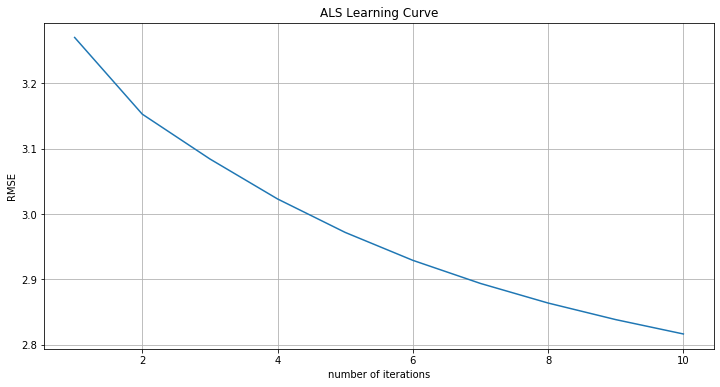

In [31]:
# create an array of num_iters
iter_array = list(range(1, 11))

# create learning curve plot
plot_learning_curve(iter_array, train, test, 0.05, 20)

<font color='red'> **_@TOMMY: for the graph above, you use lambda=0.05 and rank=20. Shouldn't we do it rather with the best parameters found in grid search (i.e. 0.2 and 8)?_** </font>

And finally let's evaluate the final model by computing the RMSE on our test data:

In [32]:
predictions = final_model.transform(test)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="_3",
                                predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

Root-mean-square error = 2.6822093319222815


<font color='red'> **_@TOMMY: maybe add here a short final conclusion, just comparing this model with the previous ones, and concluding the project. After that I think we're done, it's great!! Bravo amigo!_** </font>